In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import datetime
print 'Done'

Done


In [2]:
import json
import pandas

#Function to read Tweets
def readTweets(path):
    data = open(path)
    itemlist = []
    for line in data:
        item = json.loads(line)
        itemlist.append(item)
    return itemlist

def createDF(TweetList):
    df = pandas.DataFrame(data=TweetList)
    return df

def colTypeViewer(df):
    rowManager = 0
    for key in df.columns.values:
        print key, str(type(df[key][0]))
        rowManager+=1
        if rowManager == 2:
            rowManager = 0
            print('')

In [3]:
iPhoneTweets = createDF(readTweets('Before - iPhoneX_Tweets.json'))

print('Dataset Dimensions:')
print('\tNumber of Keys (Columns): ' + str(iPhoneTweets.shape[0]))
print('\tNumber of Entries (Rows): ' + str(iPhoneTweets.shape[1]))

Dataset Dimensions:
	Number of Keys (Columns): 94012
	Number of Entries (Rows): 30


In [4]:
iPhoneTweets.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sun Oct 29 23:06:07 +0000 2017,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,None,924774374649065472,924774374649065472,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","Fucking hell, what a cracking piece of journal...",False,"{u'follow_request_sent': None, u'has_extended_..."
1,None,None,Sun Oct 29 23:06:05 +0000 2017,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,None,924774367304720385,924774367304720385,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",iPhoneX初回出荷分ついに発送開始！ドバイの皇太子はすでにiPhoneXゲット？ htt...,False,"{u'follow_request_sent': None, u'has_extended_..."
2,None,None,Sun Oct 29 23:06:01 +0000 2017,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,None,924774349524971520,924774349524971520,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",iPhoneX初回出荷分ついに発送開始！ドバイの皇太子はすでにiPhoneXゲット？ htt...,False,"{u'follow_request_sent': None, u'has_extended_..."
3,None,None,Sun Oct 29 23:06:00 +0000 2017,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,None,924774348912779265,924774348912779265,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",（S）NTTdocomo（ドコモ）でiPhoneXをインターネット予約完了した後の状況確認を...,False,"{u'follow_request_sent': None, u'has_extended_..."
4,None,None,Sun Oct 29 23:05:56 +0000 2017,"{u'symbols': [], u'media': [{u'expanded_url': ...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,None,924774329186795520,924774329186795520,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",iPhoneX初回出荷分ついに発送開始！ドバイの皇太子はすでにiPhoneXゲット？ htt...,False,"{u'follow_request_sent': None, u'has_extended_..."


In [9]:
# Extracting data from Tweet Dataset
tweetText = createDF(iPhoneTweets['text'])

In [10]:
import nltk
from nltk.corpus import stopwords
valid_words = set(nltk.corpus.words.words())

In [11]:
col = ['word']
pos_words = pandas.read_csv('positive-corpus.csv')
neg_words = pandas.read_csv('negative-corpus.csv')
pos_words.columns = col
neg_words.columns = col
pos_list = pos_words['word'].tolist()
neg_list = neg_words['word'].tolist()
senti_list = pos_list + neg_list

In [16]:
def clean_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>2]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    #cleaned_word = [x for x in cleaned_word if x in senti_list]
    #print cleaned_word
    return cleaned_word

In [17]:
clean_tweet = clean_tweet(tweetText.text)
clean_df = createDF(clean_tweet)
clean_df.head()

,0
0,hell
1,cracking
2,piece
3,journalism
4,smooth


In [18]:
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('clean_tweet_before_words.csv', encoding='utf-8')
top_words.head()

,word,count
0,coincidence,11080
1,new,5024
2,order,2991
3,preorder,2986
4,get,2463


In [19]:
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,coincidence,11080
1,new,5024
2,order,2991
3,preorder,2986
4,get,2463
5,trying,2088
6,like,1665
7,car,1652
8,one,1610
9,first,1574


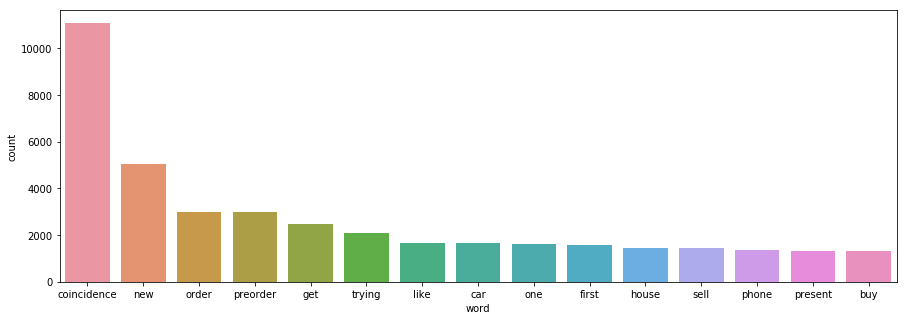

In [20]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'word', y = 'count', data = top_df)
plt.show()
fig.savefig('top_words_before_launch.png')

All frequencies, including STOPWORDS:
                         Word  Frequency
0  (coincidence, coincidence)       2697
1                (order, new)       1511
2          (trying, preorder)       1461
3             (preorder, new)       1419
4         (present, stickers)       1307
5          (stickers, belong)       1307
6                 (sell, car)       1286
7                (car, house)       1286
8           (house, whatever)       1279
9                (one, first)        919


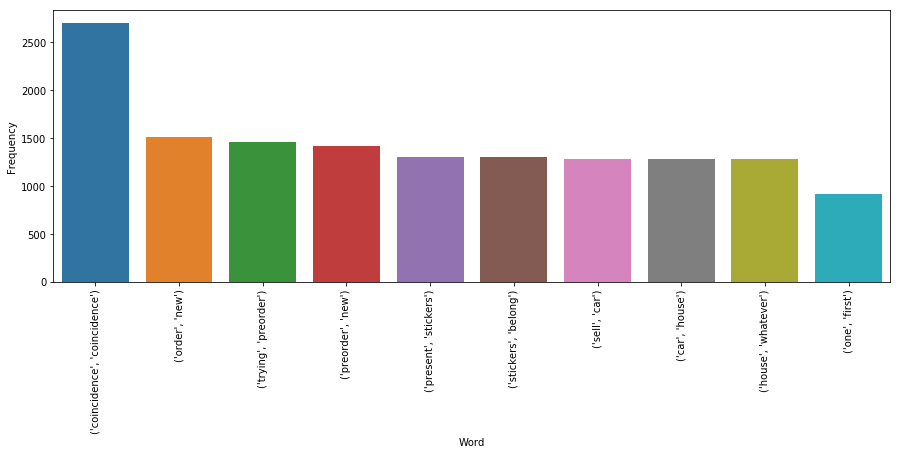

In [21]:
bgs2 = nltk.bigrams(clean_tweet)

# compute frequency distribution for all the bigrams 
fdist2 = nltk.FreqDist(bgs2)

rslt2 = pd.DataFrame(Counter(fdist2).most_common(10),columns=['Word', 'Frequency'])
print('All frequencies, including STOPWORDS:')
print('=' * 60)
print(rslt2)
print('=' * 60)


fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'Word', y = 'Frequency', data = rslt2)
plt.xticks(rotation= 90)
plt.show()
fig.savefig('bigram_before_launch.png',bbox_inches = 'tight')

In [22]:
def get_only_sentiment_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in senti_list]
    #print cleaned_word
    return cleaned_word

In [23]:
clean_sentiment = get_only_sentiment_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('sentiment_before_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,like,1665
1,win,923
2,ready,635
3,best,630
4,right,573
5,broke,538
6,grand,493
7,dead,418
8,enough,364
9,available,330


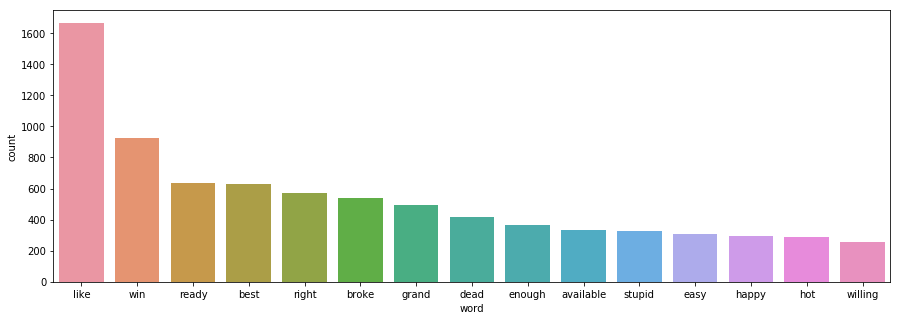

In [24]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'word', y = 'count', data = top_df)
plt.show()
fig.savefig('top_sentiment_words_before_launch.png')

In [57]:
top_words.to_csv('sentiment_before_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)

d = {}
for a, x in top_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

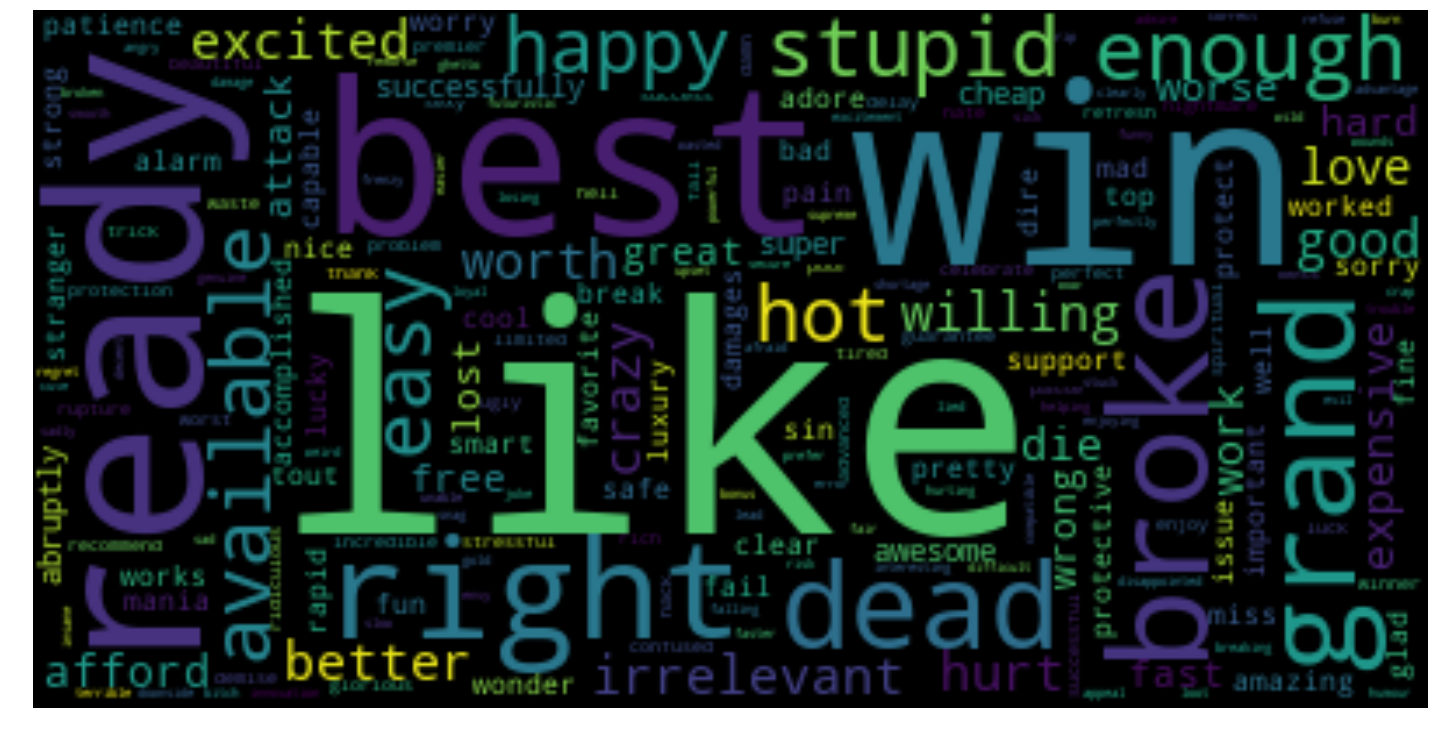

In [58]:
plt.show()

In [60]:
def get_positive_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in pos_list]
    #print cleaned_word
    return cleaned_word

In [61]:
clean_sentiment = get_positive_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('positive_before_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,like,1665
1,win,923
2,ready,635
3,best,630
4,right,573
5,grand,493
6,enough,364
7,available,330
8,easy,309
9,happy,295


In [80]:
top_df = pandas.read_csv('positive_before_words.csv')
top_df = top_df.sort_values('count', ascending=False)
top_df = top_df.head(15)

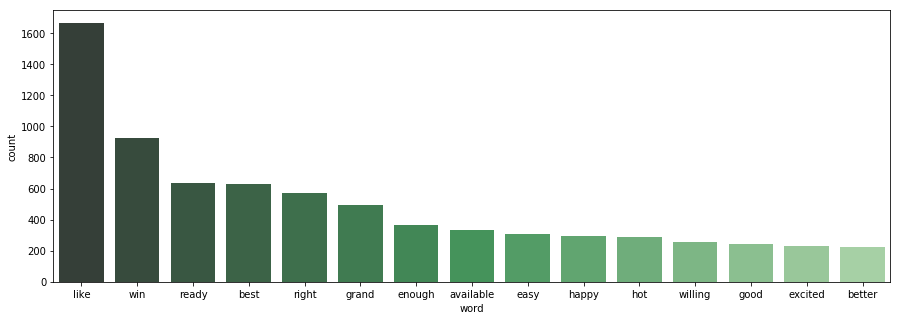

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
pal = sns.color_palette("Greens_d",len(top_df['count']))
sns.barplot(x = 'word', y = 'count', data = top_df,palette=pal)
plt.show()
fig.savefig('top_positive_words_before_launch.png')

In [63]:
def get_negative_tweet(data):
    cleaned_word = [x.encode('UTF8') for x in data] 
    cleaned_word = nltk.word_tokenize(str(cleaned_word))
    cleaned_word = [x for x in cleaned_word if len(x)>1]
    cleaned_word = [x for x in cleaned_word if x not in stopwords.words('english')]
    cleaned_word = [x for x in cleaned_word if x in valid_words]
    cleaned_word = [str.lower(i) for i in cleaned_word ]
    cleaned_word = [x for x in cleaned_word if x in neg_list]
    #print cleaned_word
    return cleaned_word

In [64]:
clean_sentiment = get_negative_tweet(tweetText.text)
clean_df = createDF(clean_sentiment)
top_words  = createDF(clean_df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts())
top_words = top_words.reset_index()
top_words.columns = ['word','count']
top_words.to_csv('negative_before_words.csv', encoding='utf-8')
top_df = top_words.sort_values('count', ascending=False)
top_df = top_df.head(15)
top_df

,word,count
0,broke,538
1,dead,418
2,stupid,327
3,irrelevant,242
4,hurt,217
5,crazy,207
6,die,163
7,expensive,156
9,hard,140
8,worse,140


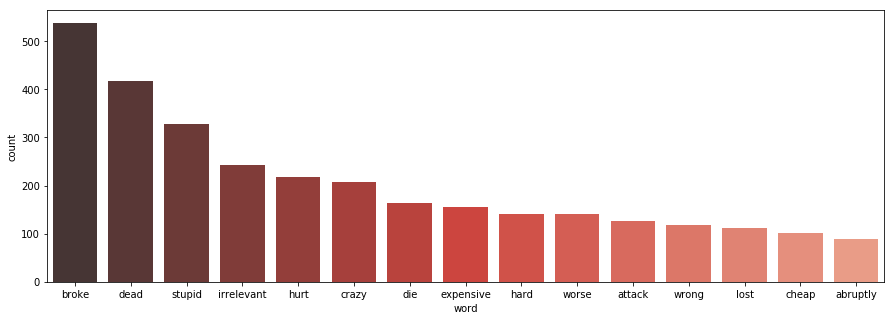

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
pal = sns.color_palette("Reds_d",len(top_df['count']))
sns.barplot(x = 'word', y = 'count', data = top_df,palette=pal)
plt.show()
fig.savefig('top_negative_words_before_launch.png')